In [ ]:
!pip3 install psycopg2

In [6]:
# Dependencies and Setup
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
from password import password
from scipy import stats
import os
import psycopg2 as pg2

In [7]:
from sqlalchemy import create_engine

In [9]:
#create connection with PostgreSQL
conn = pg2.connect(database='Employee_Homework', user='postgres',password= password)
#Establish connection and start cursor to be ready to query
cur = conn.cursor()
#pass in a query as a string
cur.execute('SELECT * FROM salaries')

In [10]:
# Return first row
cur.fetchone()
# create salary range df
Salary_ranges = pd.read_sql('SELECT * FROM salaries', conn)
# check df
Salary_ranges.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


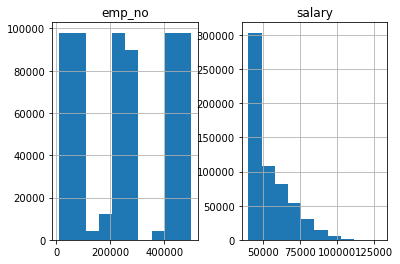

In [11]:
hist = Salary_ranges.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247D4BB9F60>]],
      dtype=object)

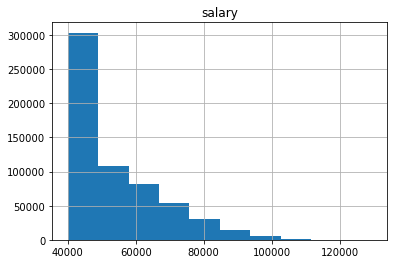

In [12]:
Salary_ranges.hist(column='salary')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247D5F97E80>]],
      dtype=object)

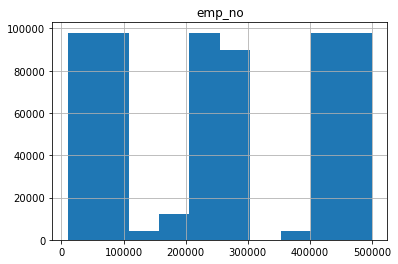

In [13]:
Salary_ranges.hist(column='emp_no')

In [14]:
#create connection with PostgreSQL
conn1 = pg2.connect(database='Employee_Homework', user='postgres',password= password)
#Establish connection and start cursor to be ready to query
cur1 = conn1.cursor()
#pass in a query as a string
cur1.execute('SELECT * FROM employee')

In [15]:
# Return first row
cur1.fetchone()
# create salary range df
emp_no_info = pd.read_sql('SELECT * FROM employee', conn1)
# check df
emp_no_info.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


#create connection with PostgreSQL
conn2 = pg2.connect(database='Employee_Homework', user='postgres',password='Heyyoumf22!')
#Establish connection and start cursor to be ready to query
cur2 = conn1.cursor()
#pass in a query as a string
cur2.execute('SELECT * FROM emp_title')

In [16]:
#create connection with PostgreSQL
conn2 = pg2.connect(database='Employee_Homework', user='postgres',password= password)
#Establish connection and start cursor to be ready to query
cur2 = conn1.cursor()
#pass in a query as a string
cur2.execute('SELECT * FROM titles')

In [17]:
# Return first row
cur.fetchone()
# create salary range df
emp_no_title = pd.read_sql('SELECT * FROM titles', conn2)
# check df
emp_no_title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [18]:
# Combine the data into a single dataset
merge_data_df = pd.merge(emp_no_info, Salary_ranges, on="emp_no")
merge_data_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
2,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
3,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
4,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973


In [19]:
new_title = emp_no_info.rename(columns={"emp_title_id": "title_id"})
#summary = pd.DataFrame({'emp_no': emp_no,'emp_title_id': emp_title_id})
drop_df = new_title.drop({'birth_date', 'first_name', 'last_name', 'sex', 'hire_date'}, axis=1)
drop_df.head()

,emp_no,title_id
0,473302,s0001
1,475053,e0002
2,57444,e0002
3,421786,s0001
4,282238,e0003


In [20]:
merge_df = pd.merge(drop_df, merge_data_df)

drop_df2 = merge_df.drop({'emp_no', 'birth_date', 'first_name', 'last_name', 'sex', 'hire_date', 'emp_title_id'}, axis=1)
drop_df2.head()

,title_id,salary
0,s0001,40000
1,s0001,40000
2,e0002,53422
3,e0002,53422
4,e0002,48973


In [21]:

# Combine the data into a single dataset
merge_data = pd.merge(emp_no_title, drop_df2)
drop_df3 = merge_data.drop({'title_id'}, axis=1)
drop_df3.head()

,title,salary
0,Staff,40000
1,Staff,40000
2,Staff,40000
3,Staff,40000
4,Staff,56087


In [22]:
average = drop_df3.groupby(['title']).mean().round(2)
average

,salary
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


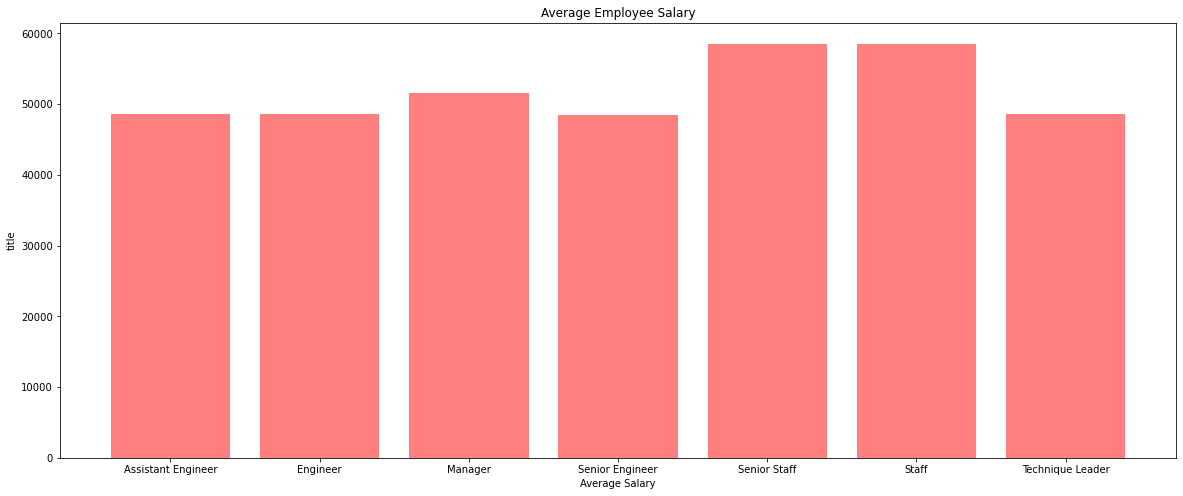

In [23]:
average['title']= average['salary'].astype(int)
x_axis = np.arange(len(average))

#set size
plt.figure(figsize=(20,8))

#set color, rotations of label and x axis
plt.bar(x=average.index, height=average.salary, color='r', alpha=0.5)

#Set Title and label
plt.title('Average Employee Salary')
plt.ylabel('title')
plt.xlabel('Average Salary')

#print
plt.show()

In [24]:
#close 
conn.close()